In [88]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [107]:
allProductDf = pd.read_csv('./allProduct.csv')

In [90]:
allProductDf.head()

,Unnamed: 0,order_id,product_id,price,freight_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,...,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value
0,0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,58.9,13.29,97ca439bc427b48bc1cd7177abe71365,5,NaN,"Perfeito, produto entregue antes do combinado.",2017-09-21 00:00:00,...,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29 00:00:00,1,credit_card,2,72.19
1,1,130898c0987d1801452a8ed92a670612,4244733e06e7ecb4970a6e2683c13e61,55.9,17.96,b11cba360bbe71410c291b764753d37f,5,NaN,"lannister como sempre, entregou certinho e den...",2017-07-14 00:00:00,...,delivered,2017-06-28 11:52:20,2017-06-29 02:44:11,2017-07-05 12:00:33,2017-07-13 20:39:29,2017-07-26 00:00:00,1,boleto,1,73.86
2,2,532ed5e14e24ae1f0d735b91524b98b9,4244733e06e7ecb4970a6e2683c13e61,64.9,18.33,af01c4017c5ab46df6cc810e069e654a,4,super recomendo,carrinho muito bonito,2018-06-05 00:00:00,...,delivered,2018-05-18 10:25:53,2018-05-18 12:31:43,2018-05-23 14:05:00,2018-06-04 18:34:26,2018-06-07 00:00:00,1,credit_card,2,83.23
3,3,6f8c31653edb8c83e1a739408b5ff750,4244733e06e7ecb4970a6e2683c13e61,58.9,16.17,8304ff37d8b16b57086fa283fe0c44f8,5,NaN,NaN,2017-08-10 00:00:00,...,delivered,2017-08-01 18:38:42,2017-08-01 18:55:08,2017-08-02 19:07:36,2017-08-09 21:26:33,2017-08-25 00:00:00,1,credit_card,3,75.07
4,4,7d19f4ef4d04461989632411b7e588b9,4244733e06e7ecb4970a6e2683c13e61,58.9,13.29,426f43a82185969503fb3c86241a9535,5,NaN,NaN,2017-08-25 00:00:00,...,delivered,2017-08-10 21:48:40,2017-08-10 22:05:11,2017-08-11 19:43:07,2017-08-24 20:04:21,2017-09-01 00:00:00,1,credit_card,4,72.19


In [91]:
allProductDf.order_status.value_counts()

delivered      114067
shipped          1225
canceled          553
invoiced          364
processing        362
unavailable         7
approved            3
Name: order_status, dtype: int64

In [15]:
allProductDf['Total_Price'] = allProductDf.price.astype(int) + allProductDf.freight_value.astype(int)

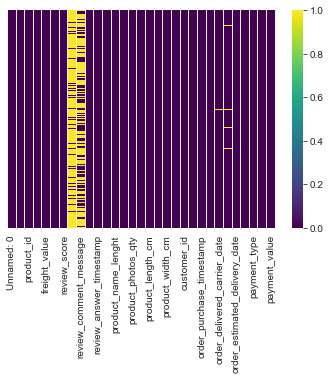

In [92]:
sns.heatmap(allProductDf.isnull(),yticklabels=False,cmap='viridis')

In [93]:
from sklearn import preprocessing

In [94]:
label_encoder = preprocessing.LabelEncoder()  
allProductDf['encodedCategory']= label_encoder.fit_transform(allProductDf['product_category_name_english'])

In [95]:
allProductDf['TargetVar']=allProductDf.order_status.apply(lambda x: 1 if x in ['delivered','invoiced','shipped'] else 0)
 

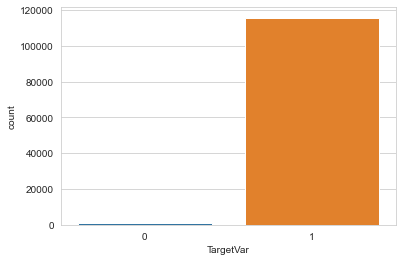

In [96]:
allProductDf.TargetVar.unique()
sns.set_style('whitegrid')
sns.countplot(x='TargetVar',data=allProductDf)

Dataset is imbalanced the dataset includes most of the products which are either delivered,shipped,invoiced

In [97]:
allProductDf.TargetVar.value_counts()

1    115656
0       925
Name: TargetVar, dtype: int64

In [98]:
((925)/(925+115656))*100

0.7934397543338967

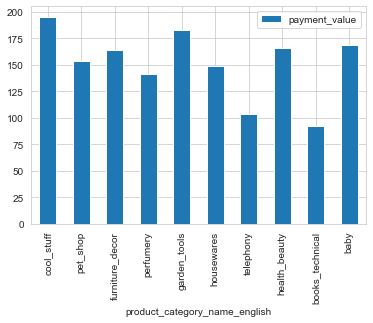

In [100]:
allProductDf.groupby('product_category_name_english',sort=False)[['payment_value']].mean()[:10].plot(kind="bar")

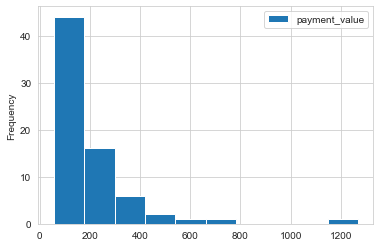

In [101]:
allProductDf.groupby('product_category_name_english',sort=False)[['payment_value']].mean().plot(kind="hist",bins=10)

Looking at bar graph it shows cool stuff has the highest price ,while histogram shows that maximum products has the price less than 100

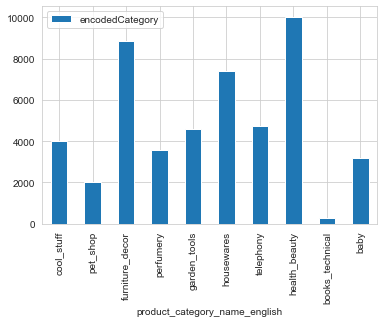

In [102]:
allProductDf.groupby('product_category_name_english',sort=False)[['encodedCategory']].count()[:10].plot(kind="bar")

Most common category in the dataset is health beauty

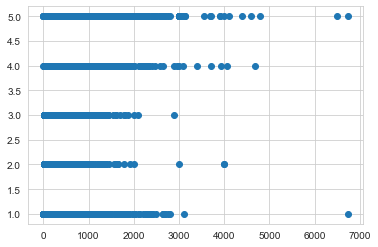

In [103]:
plt.scatter(allProductDf.price,allProductDf.review_score)

Price and rating scatter plot

In [108]:
allProductDf=allProductDf.drop(['order_status','Unnamed: 0','order_id','product_id'], axis=1)

In [ ]:
allProductDf=allProductDf.drop(['review_id'], axis=1)

In [52]:
dfFilter=allProductDf[['review_score','price','freight_value','encodedCategory','Total_Price']]

In [109]:
allProductDf.head()

,price,freight_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,product_category_name,product_name_lenght,...,customer_id,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value
0,58.9,13.29,97ca439bc427b48bc1cd7177abe71365,5,NaN,"Perfeito, produto entregue antes do combinado.",2017-09-21 00:00:00,2017-09-22 10:57:03,cool_stuff,58.0,...,3ce436f183e68e07877b285a838db11a,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29 00:00:00,1,credit_card,2,72.19
1,55.9,17.96,b11cba360bbe71410c291b764753d37f,5,NaN,"lannister como sempre, entregou certinho e den...",2017-07-14 00:00:00,2017-07-17 12:50:07,cool_stuff,58.0,...,e6eecc5a77de221464d1c4eaff0a9b64,2017-06-28 11:52:20,2017-06-29 02:44:11,2017-07-05 12:00:33,2017-07-13 20:39:29,2017-07-26 00:00:00,1,boleto,1,73.86
2,64.9,18.33,af01c4017c5ab46df6cc810e069e654a,4,super recomendo,carrinho muito bonito,2018-06-05 00:00:00,2018-06-06 21:41:12,cool_stuff,58.0,...,4ef55bf80f711b372afebcb7c715344a,2018-05-18 10:25:53,2018-05-18 12:31:43,2018-05-23 14:05:00,2018-06-04 18:34:26,2018-06-07 00:00:00,1,credit_card,2,83.23
3,58.9,16.17,8304ff37d8b16b57086fa283fe0c44f8,5,NaN,NaN,2017-08-10 00:00:00,2017-08-13 03:35:17,cool_stuff,58.0,...,30407a72ad8b3f4df4d15369126b20c9,2017-08-01 18:38:42,2017-08-01 18:55:08,2017-08-02 19:07:36,2017-08-09 21:26:33,2017-08-25 00:00:00,1,credit_card,3,75.07
4,58.9,13.29,426f43a82185969503fb3c86241a9535,5,NaN,NaN,2017-08-25 00:00:00,2017-08-28 00:51:18,cool_stuff,58.0,...,91a792fef70ecd8cc69d3c7feb3d12da,2017-08-10 21:48:40,2017-08-10 22:05:11,2017-08-11 19:43:07,2017-08-24 20:04:21,2017-09-01 00:00:00,1,credit_card,4,72.19


In [79]:
X=allProductDf.drop(['order_id','product_id','review_comment_title','review_comment_message','product_category_name_english','TargetVar','Unnamed: 0'], axis=1)

In [80]:
Y=allProductDf['TargetVar']

In [81]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=1)

In [82]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.model_selection import KFold,GridSearchCV

In [83]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred=rf.predict(X_test)

In [84]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.23      0.36       271
           1       0.99      1.00      1.00     33235

    accuracy                           0.99     33506
   macro avg       0.89      0.62      0.68     33506
weighted avg       0.99      0.99      0.99     33506

[[   63   208]
 [   18 33217]]
0.9932549394138364


In [85]:
rf_features=pd.DataFrame(rf.feature_importances_)
rf_features['Features']=list(X_train)
rf_features.sort_values(by=0,ascending=False).head()

,0,Features
2,0.292762,freight_value
1,0.278806,price
4,0.213500,Total_Price
3,0.163742,encodedCategory
0,0.051191,review_score
